In [1]:
# Imports
from   datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from   cartopy.util import add_cyclic_point
import xarray as xr
import sys
from   matplotlib.colors import LinearSegmentedColormap
from   colInterpolatOr import *


In [10]:
# Definition of paths and variables
pathData = "/scratch/project_465000898/barthele/models/nemo/experiments/nemo-4.2.2/eorca12_elic/outputs"

varConc = "siconc"
dimTime = "time_counter"



In [11]:
# Reading the data
fileIn = pathData + "/" + "1960-12-01_1960-12-31" + "/" + "eorca12_elic_1d_19601201_19601231_icemod.nc"

ds = xr.open_dataset(fileIn)
nt = ds.dims[dimTime]

# Get the time-invariant lat/lon fields

lon = ds.variables["nav_lon"].values
lat = ds.variables["nav_lat"].values


/tmp/ipykernel_118157/3882778544.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  nt = ds.dims[dimTime]


In [12]:
#print(ds.variables["time_counter"][jt].values)


0


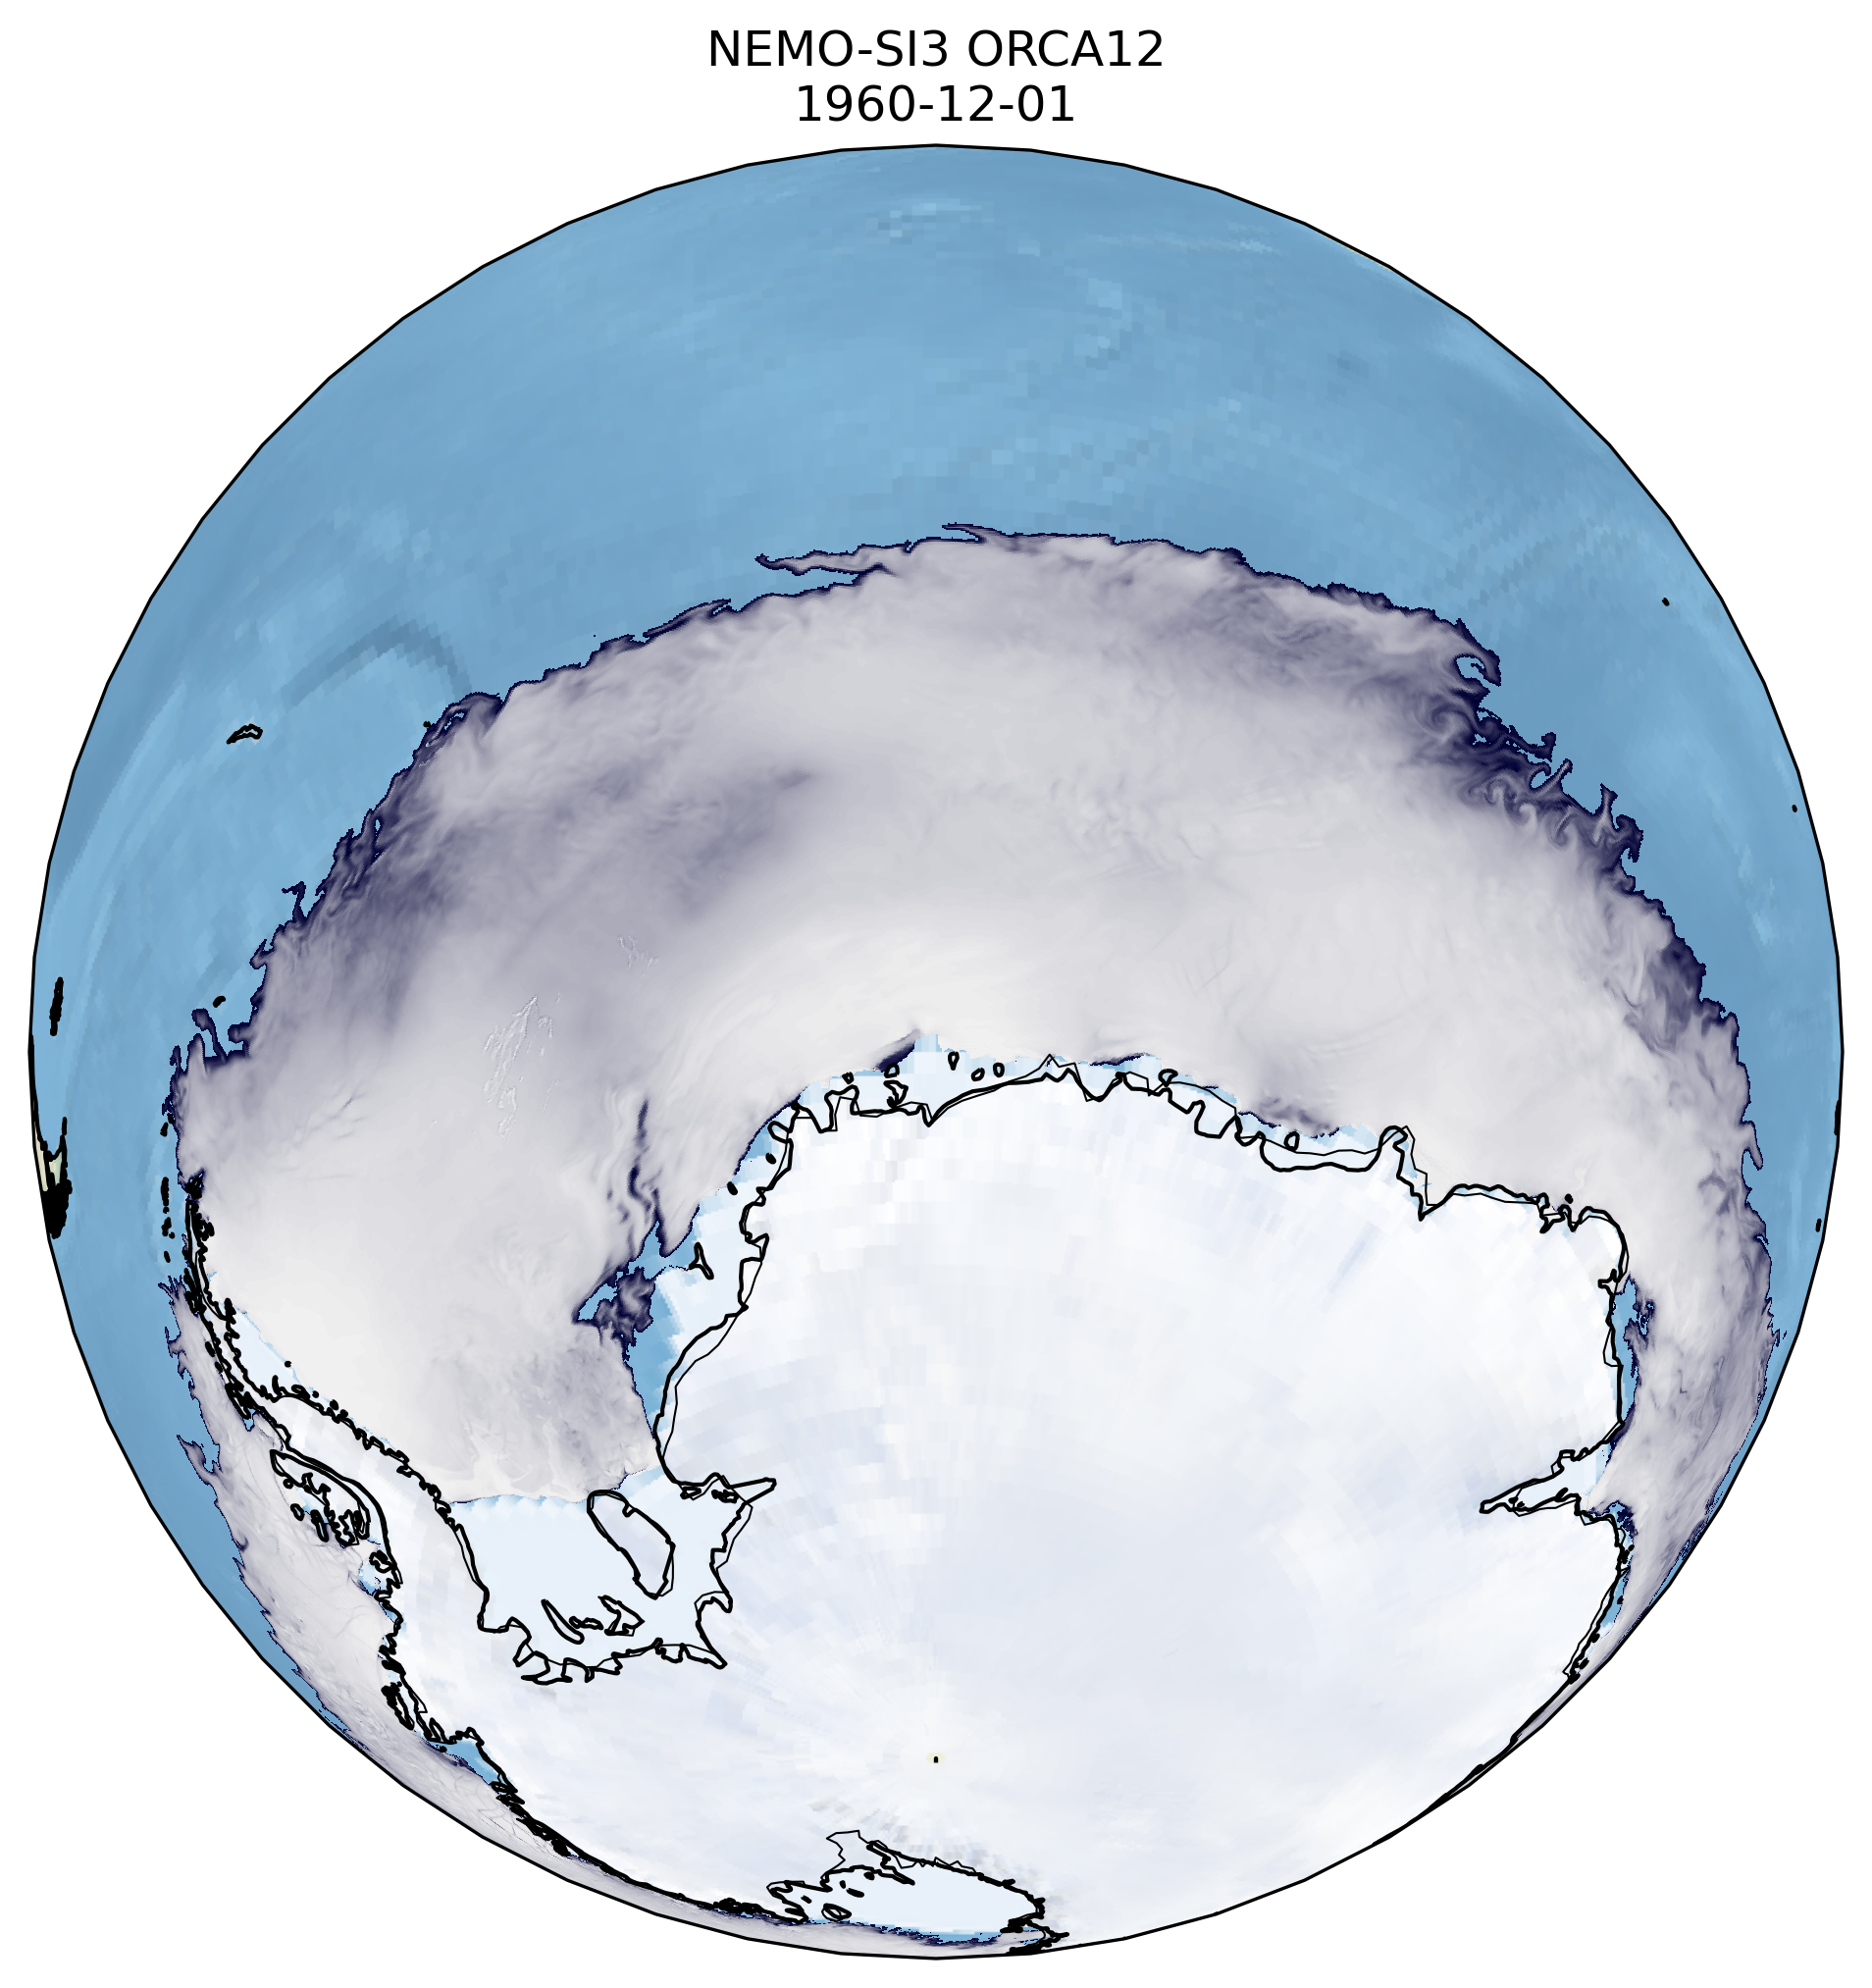

1


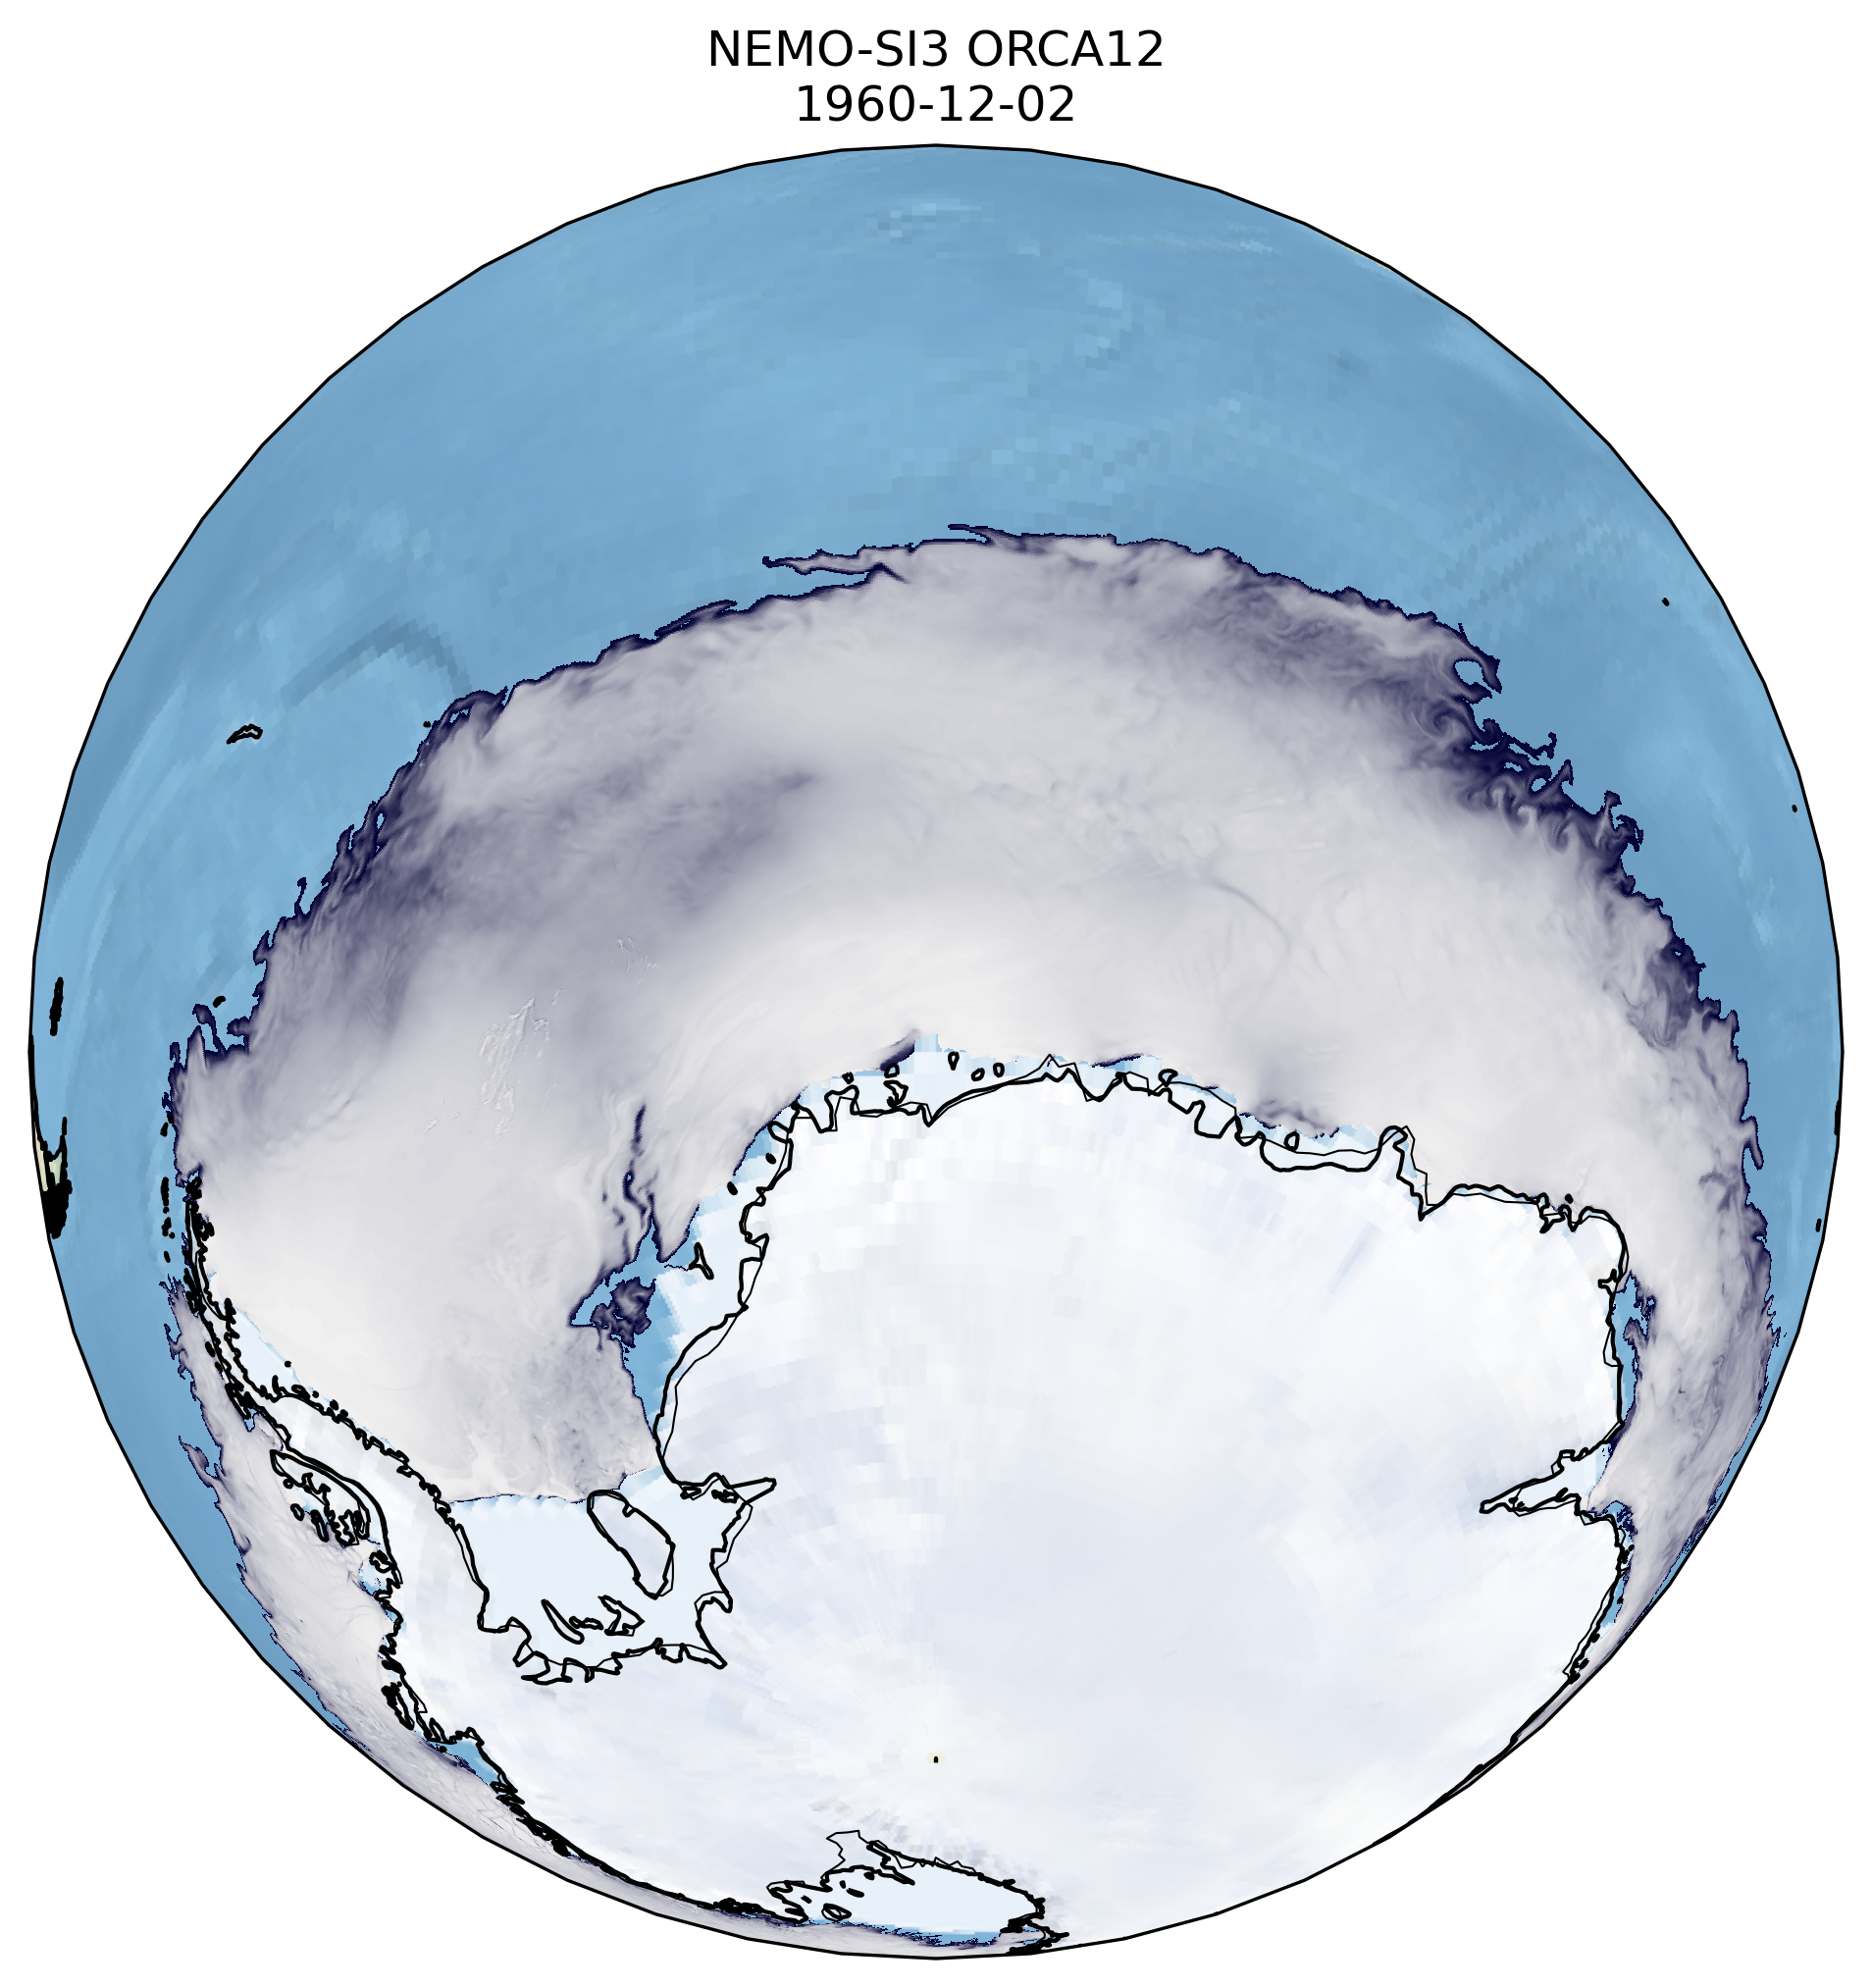

2


In [42]:
# Create map
#sourceColors = [[0.4, 0.5, 0.8], [0.1, 0.4, 0.75], [0.0, 0.25, 0.4], [0.0, 0.15, 0.6], [0.9, 0.9, 0.9], [1.0, 1.0, 1.0]]
#sourceColors = [[0.4, 0.5, 0.8], [0.1, 0.4, 0.75], [0.1, 0.1, 0.1], [0.3, 0.3, 0.3], [0.5, 0.5, 0.5], [0.7, 0.7, 0.7], [0.8, 0.8, 0.8],[1.0, 1.0, 1.0]]

#masterColors = [[0.0, 0.0, 0.2],[0.0, 0.5, 0.5],[0.0, 0.5, 0.0], [1.0, 0.5, 0.0], [0.5, 0.0, 0.0] ]

#masterColors =  [ [0.1, 0.1, 0.45], [0.4, 0.5, 0.8], [0.8, 0.95, 1.0]]


#listCol = list()
#for m in masterColors:
#    alpha = 0.80
#    tmp = colInterpolatOr([m, [mm + alpha * (1 - mm) for mm in m]], 5)
#    listCol += tmp

#myCM = LinearSegmentedColormap.from_list('myCM', listCol, N = len(listCol))

sourceColors = [ [0.0, 0.0, 0.2], [0.95, 0.95, 0.95]]
myCM = LinearSegmentedColormap.from_list('myCM', sourceColors, N = 100)


projection = ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=-70.0, satellite_height=2e3 * 1e3, false_easting=0, false_northing=0, globe=None)
#projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)

for jt in range(nt):
    print(jt)
    t=ds.variables["time_counter"][jt].values
    stringTime = np.datetime_as_string(t, unit='D')

    varShow = ds.isel(time_counter = jt).variables[varConc].values
    varShow[varShow < 0.001] = np.nan

    fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(8, 8), dpi = 300)

    # Plot the field data using contourf
    levels = np.arange(0.0, 1.05, 0.05)
    contour = ax.pcolormesh(lon, lat, varShow, transform=ccrs.PlateCarree(), cmap=myCM)



    #ax.gridlines()
    ax.add_feature(cfeature.LAND, edgecolor='k')
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

    ax.stock_img()
    ax.coastlines("110m", linewidth=0.5, color="black")
    # Add colorbar
    #cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05)
    #cbar.set_label('fractional')

    # Set title
    ax.set_title('NEMO-SI3 ORCA12\n' + stringTime)

    fig.savefig(stringTime + ".png")

    # Show the plot
    #plt.show()


AttributeError: 'int' object has no attribute 'strftime'